<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Self Learning Week 4)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context attributes
**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

Data citation: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Table of Content

1. **[Data Preprocessing](#dp)**
1. **[K Nearest Neighbors (KNN)](#knn)**
2. **[Naive Bayes](#nb)**

**Import the required libraries**

In [25]:
# type your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

#### Load the csv file

In [11]:
# type your code here
data = pd.read_csv('bank.csv')
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,no
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1,yes
2,45,45,8,999,0,1.4,93.444,-36.1,4.963,5228.1,no
3,33,400,1,5,2,-1.1,94.601,-49.5,1.032,4963.6,yes
4,47,903,2,999,1,-1.8,93.075,-47.1,1.415,5099.1,yes


<a id="dp"> </a>
## 1. Data Preprocessing

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Remove the outliers (if any).</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
data_num = data.select_dtypes(include= np.number)
data_num.shape

(9640, 10)

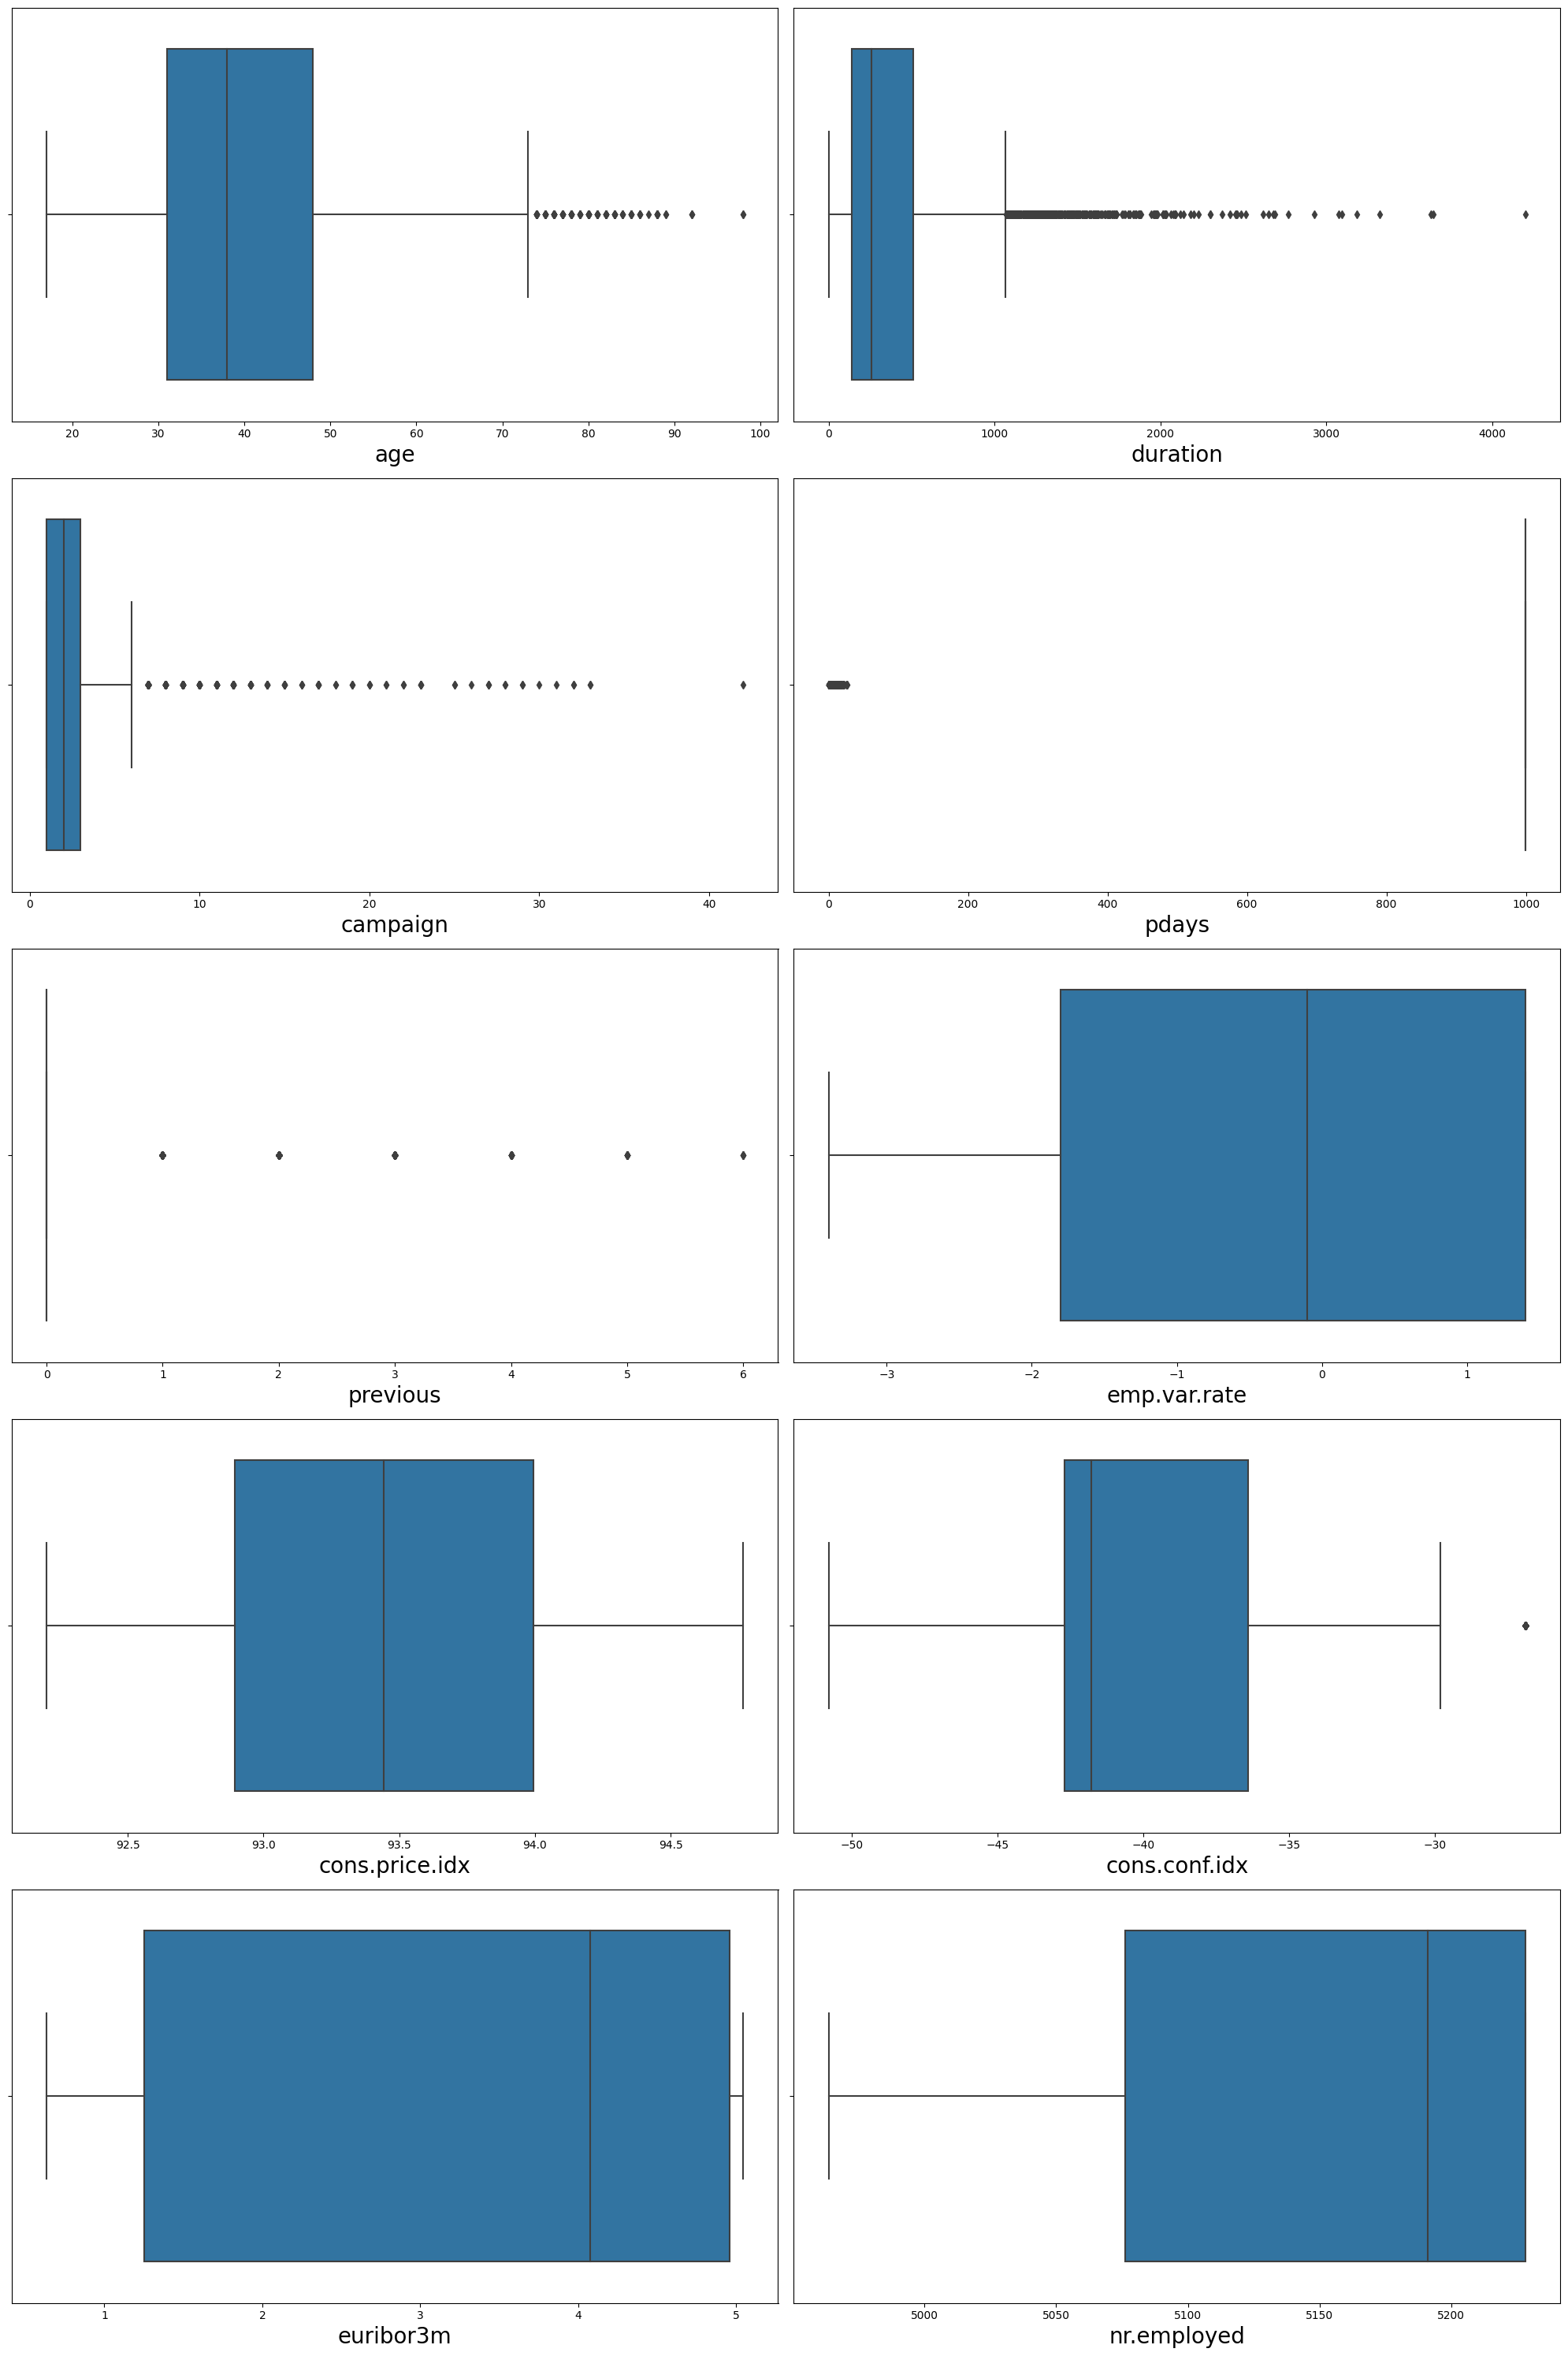

In [32]:
fig=plt.figure(figsize=(20,30))
for i, feature in enumerate(data_num):
    ax=fig.add_subplot(5,2,i+1)
    sns.boxplot(data_num[feature])
    #ax.set_title(feature,color='red')
    plt.xlabel(feature,color = 'black',fontsize = 20)
    fig.tight_layout()  
plt.show()

In [33]:
def remove_outliers(data,feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    idx = data.index[(data[feature] < Q1 - 1.5*IQR) | (data[feature] > Q3 + 1.5*IQR)]
    return idx

In [34]:
idx_lst = list()

In [36]:
for i in data_num.columns:
    idx_lst.extend(remove_outliers(data_num,i))

In [39]:
idx_set = set(idx_lst)

In [40]:
data_no_outliers = data.drop(index=idx_set)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Separate the dependent and the independent variables. Also, in the target variable, replace no with 0 and yes with 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
data_encoded = data_no_outliers.copy()

In [44]:
# type your code here
data_encoded['y'] = data_no_outliers['y'].map({'yes':1,'no':0})

In [45]:
x = data_encoded.drop('y',axis =1)
y = data_encoded['y']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Replace the value "unknown" from each column with NaN.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
# type your code here
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6555 entries, 0 to 9639
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             6555 non-null   int64  
 1   duration        6555 non-null   int64  
 2   campaign        6555 non-null   int64  
 3   pdays           6555 non-null   int64  
 4   previous        6555 non-null   int64  
 5   emp.var.rate    6555 non-null   float64
 6   cons.price.idx  6555 non-null   float64
 7   cons.conf.idx   6555 non-null   float64
 8   euribor3m       6555 non-null   float64
 9   nr.employed     6555 non-null   float64
 10  y               6555 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 614.5 KB


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Look for the null values and treat the null values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
# type your code here
data_encoded.isna().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Remove the unnecessary variables that will not contribute to the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [58]:
# type your code here
data_encoded.var()

age                 103.732072
duration          64214.958630
campaign              1.647471
pdays                 0.000000
previous              0.000000
emp.var.rate          2.646893
cons.price.idx        0.342380
cons.conf.idx        21.712605
euribor3m             3.167212
nr.employed        5540.087617
y                     0.235967
dtype: float64

In [ ]:
#pdays,previous can be removed as their variance is zero

In [59]:
data_removed = data_encoded.drop(['pdays','previous'],axis = 1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Plot the distribution of all the numeric variables and find the value of skewness for each variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
data_removed_num = data_removed.select_dtypes(include=np.number)
data_removed_num.shape

(6555, 9)

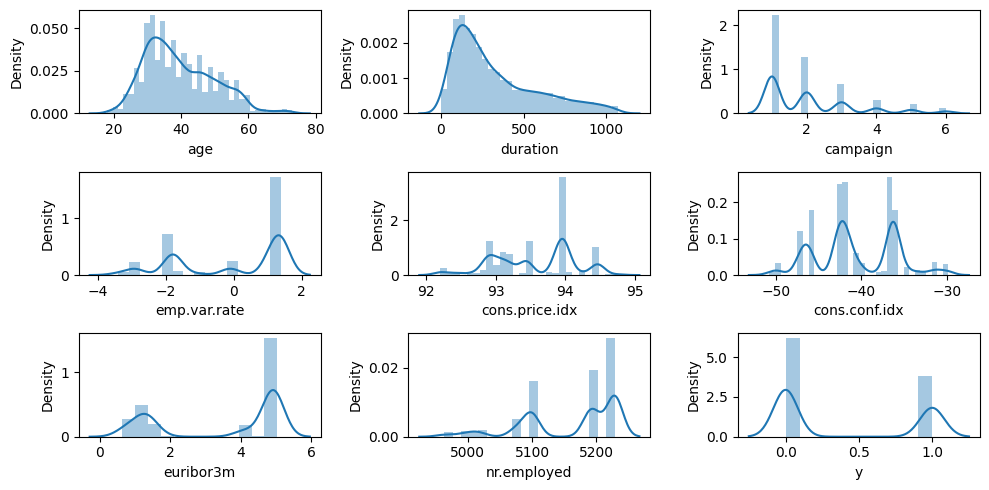

In [62]:
# type your code here
fig = plt.figure(figsize=(10,5))
for i,feature in enumerate(data_removed_num.columns):
    ax = fig.add_subplot(3,3,i+1)
    sns.distplot(data_removed_num[feature])
    plt.tight_layout()
plt.show()

In [63]:
data_removed_num.skew()

age               0.598601
duration          1.041608
campaign          1.324147
emp.var.rate     -0.575913
cons.price.idx   -0.214375
cons.conf.idx     0.104692
euribor3m        -0.545969
nr.employed      -0.880652
y                 0.488500
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

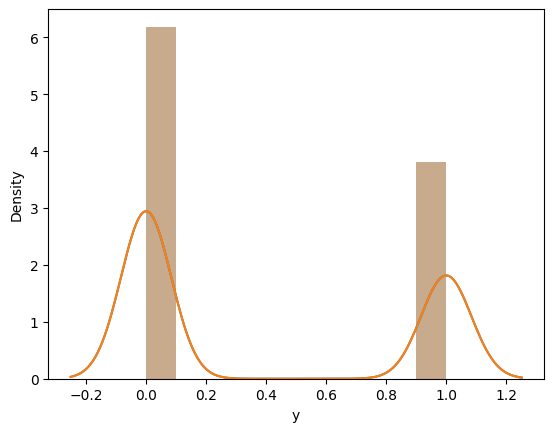

In [67]:
sns.distplot(data_removed['y'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [68]:
# type your code here
from sklearn.preprocessing import StandardScaler

In [69]:
sc = StandardScaler()
xscaled = sc.fit_transform(x)

<a id="knn"> </a>
## 2. K Nearest Neighbors (KNN)

## We shall use the bank marketing dataset that we cleaned above

Before applying classification techniques to predict whether the client subscribed the term deposit or not, let us split the dataset in train and test set.

In [70]:
# type your code here
from sklearn.model_selection import train_test_split

In [71]:
xtrain,xtest,ytrain,ytest = train_test_split(xscaled,y,train_size= 0.7)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Create a function to draw a confusion matrix (heatmap) and a function to plot a roc-auc curve.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Define a function to plot the confusion matrix.

In [112]:
from sklearn.metrics import confusion_matrix,roc_curve,accuracy_score,classification_report,roc_auc_score

In [93]:
# type your code here
def cm_plot(ypred,ytrue):
    cm = confusion_matrix(ytrue,ypred)
    sns.heatmap(cm,annot= True,fmt='.2f', cbar = False)
    plt.tight_layout()
    plt.show()
    


#### Define a function to plot the ROC curve.

In [110]:
# type your code here
def roc_plot(ypred,ytrue):
    fpr,tpr,threshold = roc_curve(ytrue,ypred)
    plt.plot(fpr,tpr)
    plt.plot([0,1],'r--')
    plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a knn model on a training dataset with euclidean distance and 3 neighbours to predict whether or not the client subscribed the term deposit. Calculate the accuracy of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [76]:
# type your code here
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn = KNeighborsClassifier(n_neighbors=3)

In [78]:
knn_model = knn.fit(xtrain,ytrain)

In [80]:
ypred_train = knn_model.predict(xtrain)
accuracy_score(ytrain,ypred_train)

0.9125980819529207

In [82]:
ypred_test = knn_model.predict(xtest)
accuracy_score(ytest,ypred_test)

0.8500254194204372

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Plot a confusion matrix using the function created above and print a classification report. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

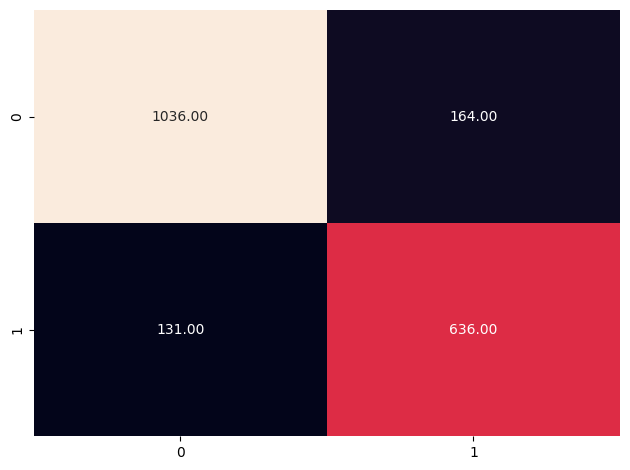

In [94]:
# type your code here
cm_plot(ypred_test,ytest)

In [97]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1200
           1       0.80      0.83      0.81       767

    accuracy                           0.85      1967
   macro avg       0.84      0.85      0.84      1967
weighted avg       0.85      0.85      0.85      1967



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the optimal value of 'k' in knn with 3 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)
    metric = ['hamming','euclidean','manhattan','Chebyshev']

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
# type your code here
knn = KNeighborsClassifier()
params = {'n_neighbors':np.arange(1, 25, 2),
         'metric':['hamming','euclidean','manhattan','Chebyshev']}
gsv = GridSearchCV(estimator=knn,param_grid=params,cv=3)
knn_gsv = gsv.fit(xtrain,ytrain)

In [100]:
knn_gsv.best_params_

{'metric': 'manhattan', 'n_neighbors': 15}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13.  Build a KNN model with the best parameters and find the accuracy. Also generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [101]:
# type your code here
knn = KNeighborsClassifier(n_neighbors=15,metric='manhattan')
knn_tuned = knn.fit(xtrain,ytrain)

In [103]:
ypred_train = knn_tuned.predict(xtrain)
accuracy_score(ytrain,ypred_train)

0.8799040976460332

In [104]:
ypred_test = knn_tuned.predict(xtest)
accuracy_score(ytest,ypred_test)

0.8622267412303

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the area under the receiver operating characteristic curve and the confusion matrix for the tuned KNN model built in question 13.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

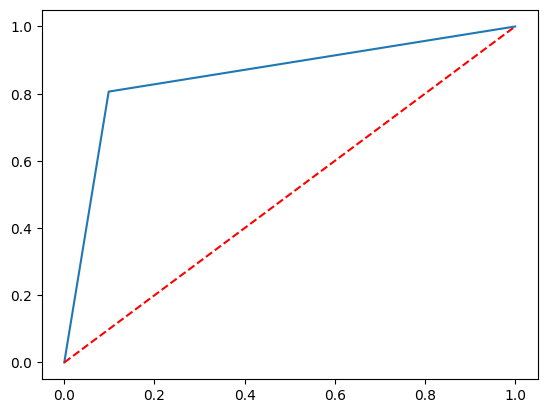

In [111]:
# type your code here
roc_plot(ytest,ypred_test)

In [113]:
roc_auc_score(ytest,ypred_test)

0.8602678183398522

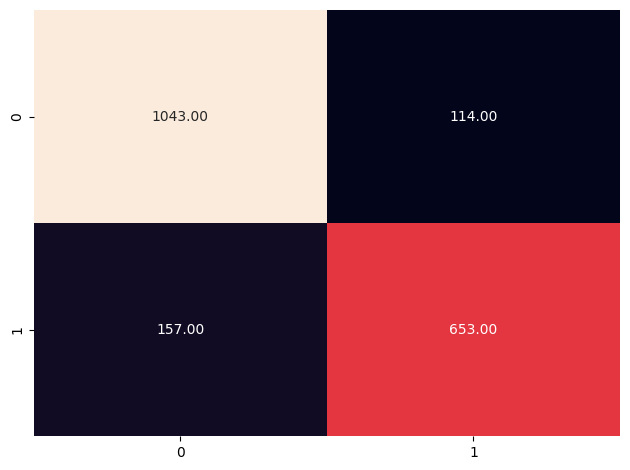

In [114]:
cm_plot(ytest,ypred_test)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the percentage of misclassified and correctly classified observations.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [115]:
# type your code here
#misclassified
total_misclassified = confusion_matrix(ytest,ypred_test)[0][1] + confusion_matrix(ytest,ypred_test)[1][0]
total_obs = ytest.shape[0]
per_missclas = (total_misclassified / total_obs) * 100
print(per_missclas)

13.777325876970007


In [116]:
#correctly classified
total_classified = confusion_matrix(ytest,ypred_test)[0][0] + confusion_matrix(ytest,ypred_test)[1][1]
total_obs = ytest.shape[0]
per_class = (total_classified / total_obs) * 100
print(per_class)

86.22267412303


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compute the accuracy for each value of k and append the value in a list 'accuracy'. Build knn models for euclidean distance metric. Consider only the odd numbers between the range 1 and 25 for the 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [133]:
# type your code here
scorecard = pd.DataFrame(columns=['k-val','accuracy'])
scorecard

,k-val,accuracy


In [134]:
def updte_df(k,accuracy):
    global scorecard
    scorecard = scorecard.append({'k-val':k,
                                    'accuracy':accuracy},ignore_index=True)
    

In [135]:
for i in range(1,25,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_dist = knn.fit(xtrain,ytrain)
    ypred_test = knn_dist.predict(xtest)
    accu = accuracy_score(ytest,ypred_test)
    updte_df(i,accu)
    

In [136]:
scorecard

,k-val,accuracy
0,1.0,0.825623
1,3.0,0.850025
2,5.0,0.864260
3,7.0,0.861210
4,9.0,0.859685
5,11.0,0.859685
6,13.0,0.860193
7,15.0,0.858668
8,17.0,0.859685
9,19.0,0.856126


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Draw a line plot to see the accuracy (list created in the above question) for each value of K using euclidean distance as a metric of KNN model and find the optimal value of 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)

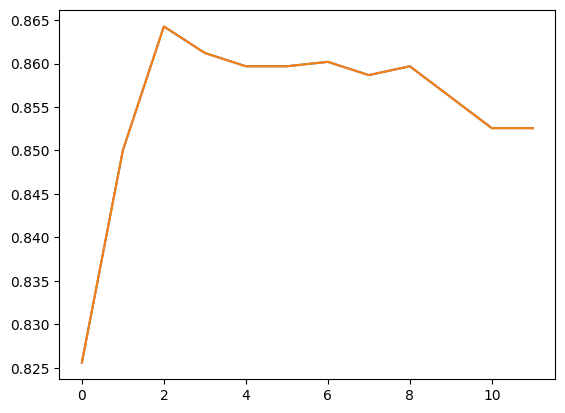

In [140]:
# type your code here
plt.plot(scorecard['accuracy'])
plt.show()

In [141]:
scorecard.sort_values(by= 'accuracy',ascending=False)

,k-val,accuracy
2,5.0,0.864260
3,7.0,0.861210
6,13.0,0.860193
4,9.0,0.859685
5,11.0,0.859685
8,17.0,0.859685
7,15.0,0.858668
9,19.0,0.856126
10,21.0,0.852567
11,23.0,0.852567


<a id="nb"> </a>
## 3. Naive Bayes

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a Gaussian naive bayes model and generate a classification report. Also tell how well is the model performing.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [142]:
# type your code here
from sklearn.naive_bayes import GaussianNB

In [143]:
nb = GaussianNB()
nb_mdl = nb.fit(xtrain,ytrain)

In [144]:
ypred = nb_mdl.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1200
           1       0.67      0.77      0.72       767

    accuracy                           0.76      1967
   macro avg       0.76      0.76      0.76      1967
weighted avg       0.77      0.76      0.77      1967



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Find the area under the receiver operating characteristic curve and the confusion matrix for the Naive Bayes model built in question 18.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [145]:
# type your code here
roc_auc_score(ytest,ypred)

0.764743046501521

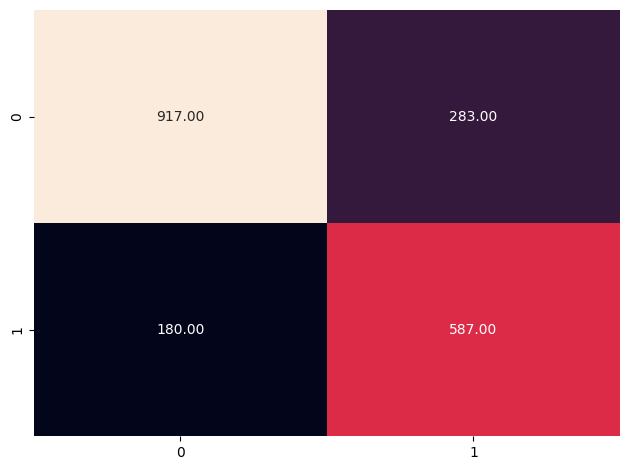

In [146]:
cm_plot(ypred,ytest)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a Gaussian Naive Bayes model and perform 10 fold cross validation and find the average accuracy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [147]:
# type your code here
from sklearn.model_selection import cross_val_score

In [148]:
cross_val_score(nb_mdl,xtrain,ytrain,cv = 10,scoring='accuracy').mean()

0.7840097611096841